# Exercise Set 8


## Mohaddeseh Mozaffari

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [5]:
data = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW8/dataprofile.txt")

In [11]:
data = data[:,1]

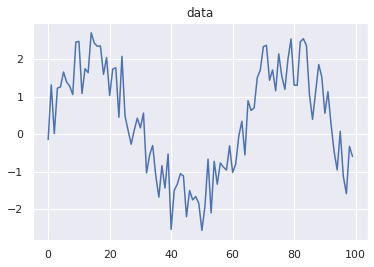

In [22]:
plt.plot(data)
plt.title("data")
plt.show()

# Q1:

![image.png](/home/mohaddeseh/Documents/Programing/Computational/HW8/n-pint.png)

## 3-point:

In [27]:
def derivative_3p(f):
    """ompute the derivative of signal with 3-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    for i in range(1,N-1):
        dr.append((f[i+1]-f[i-1])/(2*h))
    return np.array(dr)    

In [28]:
d3 = derivative_3p(data)

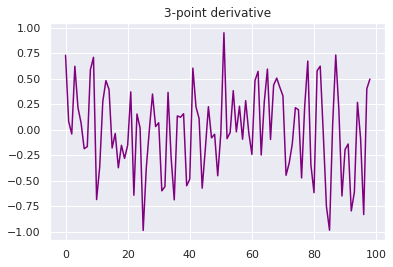

In [29]:
plt.plot(d3, color="purple")
plt.title("3-point derivative")
plt.show()

## 5-point:

In [34]:
def derivative_5p(f):
    """ompute the derivative of signal with 5-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    for i in range(2,N-2):
        dr.append((f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])/(12*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [35]:
d5 = derivative_5p(data)

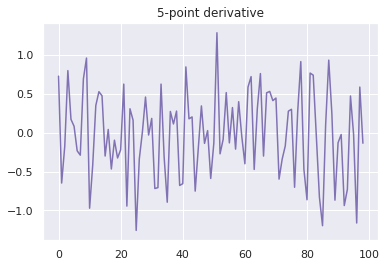

In [38]:
plt.plot(d5, color="m")
plt.title("5-point derivative")
plt.show()

## 7-point:

In [57]:
def derivative_7p(f):
    """ompute the derivative of signal with 7-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    dr.append((f[3]-f[2])/(2*h))
    for i in range(3,N-3):
        dr.append((-f[i-3]+9*f[i-2]-45*f[i-1]+45*f[i+1]-9*f[i+2]+f[i+3])/(60*h))
    dr.append((f[N-2]-f[N-3])/(2*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [58]:
d7 = derivative_7p(data)

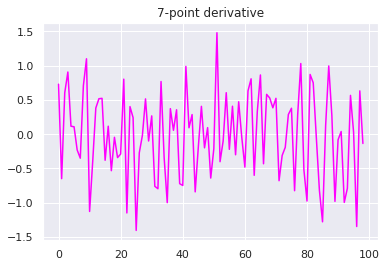

In [59]:
plt.plot(d7, color="magenta")
plt.title("7-point derivative")
plt.show()

## 9-point:

In [70]:
def derivative_9p(f):
    """ompute the derivative of signal with 9-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    dr.append((f[3]-f[2])/(2*h))
    dr.append((f[4]-f[3])/(2*h))
    for i in range(4,N-4):
        dr.append((3*f[i-4]-32*f[i-3]+168*f[i-2]-672*f[i-1]+672*f[i+1]-168*f[i+2]+32*f[i+3]-3*f[i+4])/(840*h))
    dr.append((f[N-4]-f[N-3])/(2*h))
    dr.append((f[N-3]-f[N-4])/(2*h))
    dr.append((f[N-2]-f[N-3])/(2*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [71]:
d9 = derivative_9p(data)

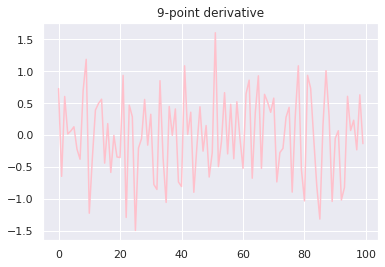

In [72]:
plt.plot(d9, color="pink")
plt.title("9-point derivative")
plt.show()

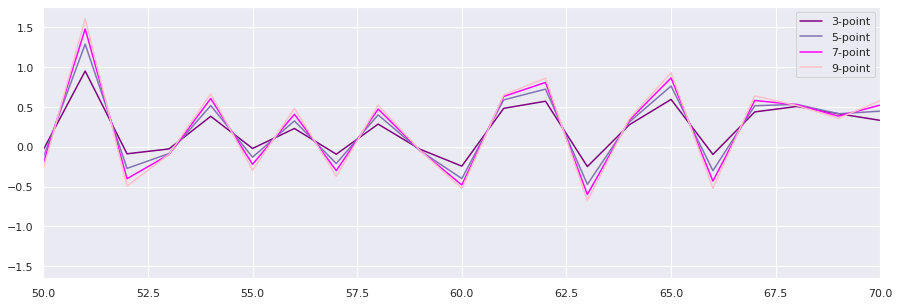

In [79]:
plt.figure(figsize=(15,5))
plt.plot(d3, color="purple", label="3-point")
plt.plot(d5, color="m", label="5-point")
plt.plot(d7, color="magenta", label="7-point")
plt.plot(d9, color="pink", label="9-point")
plt.legend()
plt.xlim(50,70)
plt.show()

# Q2:

## A)

In [142]:
#initial condition
dx = 0.5
f1 = 1
X = np.arange(1,20,0.5)
N = len(X)

### Explicit approch

In [143]:
fe = np.zeros(N)
fe[0] = f1
for i in range(N-1):
    fe[i+1] = fe[i]+ dx*(fe[i]**2)

/tmp/ipykernel_9508/4051305479.py:4: RuntimeWarning: overflow encountered in double_scalars
  fe[i+1] = fe[i]+ dx*(fe[i]**2)


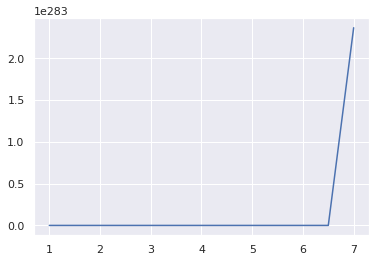

In [144]:
plt.plot(X, fe)
plt.show()

### Implicit approch

In [169]:
fi = np.zeros(N)
fi[0] = f1
for i in range(N-1):
    fi[i+1] = (1 + ((1+(4*fi[i]*dx))**0.5))/(2*dx)

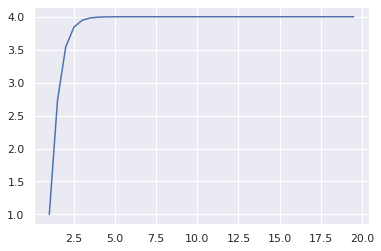

In [172]:
plt.plot(X, fi)
plt.show()

## B)

### Explicit approch

In [173]:
fe = np.zeros(N)
fe[0] = f1
for i in range(N-1):
    fe[i+1] = (1-dx)*fe[i]

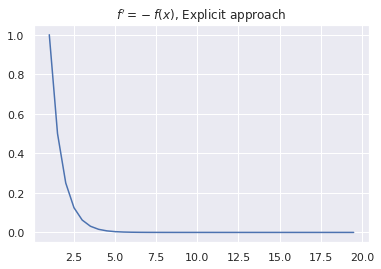

In [192]:
plt.plot(X,fe)
plt.title(r"$f'=-f(x)$, Explicit approach")
plt.show()

### Implicit approch

In [176]:
fi = np.zeros(N)
fi[0] = f1
for i in range(N-1):
    fi[i+1] = (fi[i])/(1+dx)

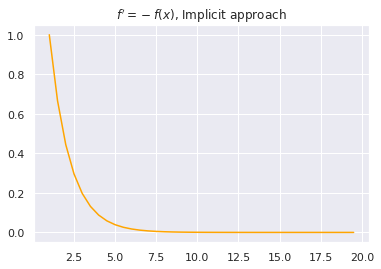

In [193]:
plt.plot(X,fi, color="orange")
plt.title(r"$f'=-f(x)$, Implicit approach")
plt.show()

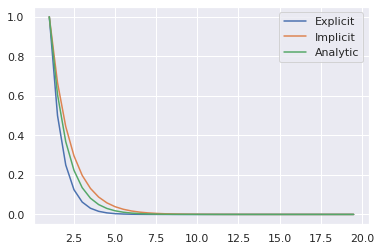

In [186]:
plt.plot(X,fe, label="Explicit")
plt.plot(X,fi, label="Implicit")
plt.plot(X,np.exp(-X+1), label="Analytic")
plt.legend()
plt.show()

As we can see, the implicit approach is closest to analytic approach.

# Q3: